In [1]:
                    #Analysis based on graphs (Fig. 1,2,3,4,5)
    
#Fig.1. The highest temperature above 100F are recorded at latitude 20-40N instead of the equator on Aug272018 at 4:40pm.
#2.The most likely reason is highly populated land masses and anthropogenic emissions.
#3. Lowest temperatures are observed towards poles but no data is avaialble for Greenland and Southpole.Total votes: {Total_votes}")

#Fig.2. point.4. Relative humidity is higher at 20-40 latitude on both Northen and Southern part of the globe.
#This trend is due to the "Trade Winds" which carry moisture from the ocean towards land.
#5. A plot of humidity versus latitude indicates a nice "camel-hump" which indicates that relative humidity level is low in the equatorial regions. 

#Fig. 3 & 4. No trend is observed for wind speed and cloud cover on the globe.

#Fig. 5.shows inverse relatioship between temperature and humidity. 
# the most likely cause is the ability of air to hold water vapors reduces at higher temperature. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import csv
from datetime import datetime as dt
import os
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#country_code= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # If the city is unique, then add it to a our cities list, it has to be in the loop withing the indeneted sapce to check each city as being addeed to the list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm <500 countries were generated
len(cities) 

    

596

## Perform API Calls

In [5]:
## to perform API call,buidling a URL
#default unit is imperical, otherwise an additional key for "units" can be added.


weather_key=api_keys.api_key
URL="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_key

citi_weather=[]

for city in cities:
    city_URL=URL+'&q='+city
    #print("processing record for the city %s.URL: %s" % (city, city_URL))
    print('processing record for the city %s'%city)
    
    #For date in the city_data, I tried to build a subloop but it did not work
    #for date in city_data:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    #converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    #converted_timestamps.append(converted_time)
        
    try:

        city_data=req.get(city_URL).json()
        city_lat=city_data["coord"]["lat"]
        city_lon=city_data["coord"]["lon"]
        city_temp=city_data["main"]["temp"]
        city_hum=city_data["main"]["humidity"]
        city_pr=city_data["main"]["pressure"]
        city_ws=city_data["wind"]["speed"]
        city_cl=city_data["clouds"]["all"]
        city_cc=city_data["sys"]["country"]
        city_date=city_data["dt"]

        citi_weather.append({"city":city, 
        "latitude":city_lat,
        "longitude":city_lon,
        "temperature":city_temp,
        "humidity":city_hum,
        "pressure":city_pr,
        "wind speed":city_ws,
        "clouds":city_cl,
        "country code":city_cc,
        "Date":city_date
})
    except:
        print('city not found')
    pass


processing record for the city kahului
processing record for the city chokurdakh
processing record for the city trelew
processing record for the city bluff
processing record for the city rikitea
processing record for the city bakchar
processing record for the city laguna
processing record for the city balykshi
city not found
processing record for the city mataura
processing record for the city upernavik
processing record for the city cape town
processing record for the city ilulissat
processing record for the city port elizabeth
processing record for the city lasa
processing record for the city arraial do cabo
processing record for the city batticaloa
processing record for the city north bend
processing record for the city totness
processing record for the city urumqi
city not found
processing record for the city plouzane
processing record for the city bethel
processing record for the city cidreira
processing record for the city illoqqortoormiut
city not found
processing record for the

processing record for the city estelle
processing record for the city san quintin
processing record for the city port hedland
processing record for the city plettenberg bay
processing record for the city uusikaupunki
processing record for the city ayni
processing record for the city sao lourenco do sul
processing record for the city biak
processing record for the city sankt veit
processing record for the city saint-francois
processing record for the city aleksandrov gay
processing record for the city ruatoria
city not found
processing record for the city jalingo
processing record for the city freetown
processing record for the city fairview
processing record for the city alyangula
processing record for the city usinsk
processing record for the city pokhara
processing record for the city fort morgan
processing record for the city lebu
processing record for the city port hardy
processing record for the city celestun
processing record for the city yalutorovsk
processing record for the cit

processing record for the city cervo
processing record for the city lagoa
processing record for the city zima
processing record for the city moranbah
processing record for the city mandera
processing record for the city bubaque
processing record for the city pullman
processing record for the city martapura
processing record for the city santa cruz de la palma
processing record for the city yichun
processing record for the city carayao
processing record for the city parrita
processing record for the city buala
processing record for the city colares
processing record for the city namie
processing record for the city tucuman
processing record for the city vladimirskaya
processing record for the city tinalmud
processing record for the city khurba
processing record for the city ambon
processing record for the city san patricio
processing record for the city bali
processing record for the city tefe
processing record for the city longlac
city not found
processing record for the city chapais
p

processing record for the city biloela
processing record for the city gari
processing record for the city esmeraldas
processing record for the city gold coast
processing record for the city coahuayana
processing record for the city brebes


In [6]:
#create csv file"cities" in a folder named output_file
#convert to dataframe first and save as csv file
city_data_df=pd.DataFrame(citi_weather)
latitude= city_data_df["latitude"]
longitude=city_data_df["longitude"]
temperature=city_data_df["temperature"]
humidity=city_data_df["humidity"]
pressure=city_data_df["pressure"]
wind_speed=city_data_df["wind speed"]
clouds=city_data_df["clouds"]
country=city_data_df["country code"]
date=city_data_df['Date'] 

city_data_df.head()        


#city_data_df.to_csv("output_data/cities.csv")



,Date,city,clouds,country code,humidity,latitude,longitude,pressure,temperature,wind speed
0,1533700560,kahului,20,US,54,20.89,-156.47,1014.00,79.21,17.22
1,1533705306,chokurdakh,0,RU,78,70.62,147.90,1034.49,49.37,10.58
2,1533705306,trelew,0,AR,94,-43.25,-65.31,1028.17,31.28,7.29
3,1533705306,bluff,0,AU,20,-23.58,149.07,1007.66,72.32,4.76
4,1533705307,rikitea,12,PF,100,-23.12,-134.97,1033.92,73.67,11.54


In [7]:
# to save city data as csv in output folder
city_data_df.to_csv("output_data/cities.csv")

In [8]:
city_data_df.dtypes

Date              int64
city             object
clouds            int64
country code     object
humidity          int64
latitude        float64
longitude       float64
pressure        float64
temperature     float64
wind speed      float64
dtype: object

In [9]:
#to check number of cities imported through citipy with weather parameters, should be >500.
city_data_df.count()

Date            541
city            541
clouds          541
country code    541
humidity        541
latitude        541
longitude       541
pressure        541
temperature     541
wind speed      541
dtype: int64

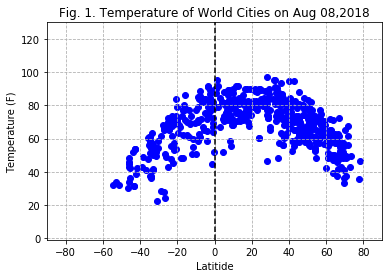

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["temperature"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Fig. 1. Temperature of World Cities on Aug 08,2018")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,130)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("temperatureofWorldCities.png")

# Show plot
plt.show()

In [11]:
#print("Results")
#print("Fig. 1. The highest temperature, above 100F is observed at 20-40 degree latitude instead of the equator as anticipated")
#print("The most likely cause, heat dissipation through rain, is higher at the equator")
#print("The lowest temperatures are observed towards poles but no data is avaialble for the north pole which is Greenland and the Southpole")



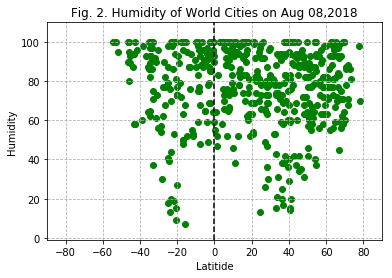

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["humidity"], marker="o", color="green")

# Incorporate the other graph properties
plt.title("Fig. 2. Humidity of World Cities on Aug 08,2018")
plt.ylabel("Humidity")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("HumidityofWorldCities.png")

# Show plot
plt.show()

In [13]:
#print("Results")
#print("Fig.2. The relative humidity show maxima at 20-40 latitude on both Northen and Southern part of the globe")
#print("This trend is due to the "Trade Winds" which carry moisture from the ocean towards land").
#print("A plot of humidity versus latitude indicates a nice "camel-hump" 
#which indicates that relative humidity level is low in the equatorial regions").

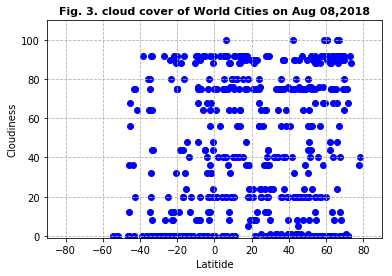

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["clouds"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Fig. 3. cloud cover of World Cities on Aug 08,2018", fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("Cloudiness")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)

# Save the figure
plt.savefig("CloudCoverofWorldCities.png")

# Show plot
plt.show()

In [15]:
#print("Resulsts from fig. 3.")
#print("No trend is observed for wind speed and cloud cover on the globe)


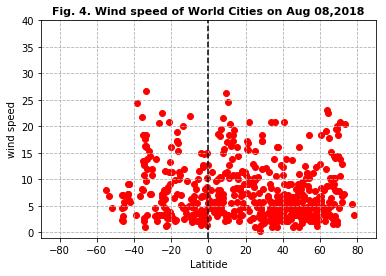

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["wind speed"], marker="o", color="red")

# Incorporate the other graph properties
plt.title("Fig. 4. Wind speed of World Cities on Aug 08,2018",fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("wind speed")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,40)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("windspeedofWorldCities.png")

# Show plot
plt.show()

In [17]:
#print("Resulsts from fig. 4.")
#print("No trend is observed for wind speed versus latitude.
#A likely pattern can be inferred that 20-40S and 20-40N shows Eastely and Westerly winds 
# and polar jet at 60N.

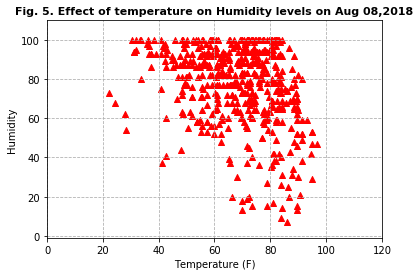

In [18]:
#to observe effect of clouds on Temperature
# Build a scatter plot for each data type
plt.scatter(city_data_df["temperature"], city_data_df["humidity"], marker="^", color="red")

# Incorporate the other graph properties
plt.title("Fig. 5. Effect of temperature on Humidity levels on Aug 08,2018",fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("Humidity")
plt.xlabel("Temperature (F)")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-0,120)
#plt.xticks(rotation='horizontal')
#plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("temp and humidity ofWorldCities.png")

# Show plot
plt.show()

In [19]:
#Fig. 5.shows inverse relatioship between temperature and humidity. 
# the most likely cause is the ability of air to hold water vapors reduces at higher temperature. 

In [20]:
# display results in .txt file
output_file = os.path.join("output_data", "WeatherPy_Results.txt")
with open(output_file, "w") as datafile:
    datafile.write("WeatherPy summary of graphs\n")
    datafile.write("Highest temperature were recorded at mid-latitude shown inFig.1\n")
    datafile.write("No trend observed for cloud and wind with latitude Fig.3-4\n")
    datafile.write("Humidity decreases with temperature as shown in Fig.5.\n")
    datafile.write("grouping/binning based on temperature and relative humidity is needed.\n")
    

   
   

# print out contents of .txt file in terminal
with open(output_file, "r") as f:
   results = f.read()
   print(results)

WeatherPy summary of graphs
Highest temperature were recorded at mid-latitude shown inFig.1
No trend observed for cloud and wind with latitude Fig.3-4
Humidity decreases with temperature as shown in Fig.5.
grouping/binning based on temperature and relative humidity is needed.

